In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the MNIST data
mnist_data = fetch_openml('mnist_784', version=1, as_frame=True, parser='auto')

In [3]:
# The image of size 28x28 pixel is already flattened into 784 feature vector.
# Step 2: Preprocess the Data
X = mnist_data.data
y = mnist_data.target

In [4]:
# Step 3: Normalize the data.
X /= 255.0

In [5]:
# Step 4: Split into training(80%) and validation(20%) set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Create and train the model
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [7]:
# Step 6: Make Predictions and Evaluate the Model.
predictions = model.predict(X_val)
# Evaluate actual value against predicted values.
accuracy = accuracy_score(y_val, predictions)
print("\nAccuracy:\n", accuracy)
# You can see True Positives in diagonally and all other FP, FN, TN in other columns.
# The TP are in good number that is why the accuracy is 0.97
confusion = confusion_matrix(y_val, predictions)
print("\nConfusion Matrix:\n", confusion)
classification_r = classification_report(y_val, predictions)
print("\nClassfication Report:\n", classification_r)


Accuracy:
 0.9699285714285715

Confusion Matrix:
 [[1337    0    2    0    0    0    2    1    1    0]
 [   0 1593    2    0    2    0    0    2    0    1]
 [  10   18 1326    1    3    1    5   10    3    3]
 [   0    3   16 1385    1    6    1    8    6    7]
 [   2    8    1    0 1261    0    1    3    0   19]
 [   2    5    0   24    2 1227    9    0    2    2]
 [   5    1    0    0    5    7 1378    0    0    0]
 [   1   23    5    0    5    0    0 1463    1    5]
 [   4   15    4   25    3   23    5   11 1257   10]
 [   5    4    3   11   24    0    0   20    1 1352]]

Classfication Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.95      1.00      0.97      1600
           2       0.98      0.96      0.97      1380
           3       0.96      0.97      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6   

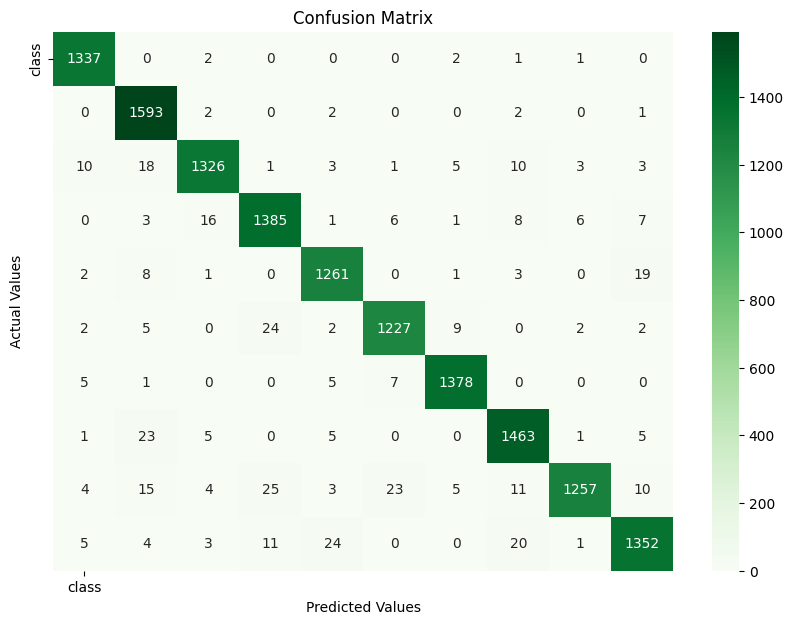

In [8]:
# Step 7: Visualization.
plt.figure(figsize=(10,7)) # I will go with Day 2 plot size.
sns.heatmap(confusion, annot=True, fmt='g', cmap='Greens', xticklabels=mnist_data.target_names, yticklabels=mnist_data.target_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()